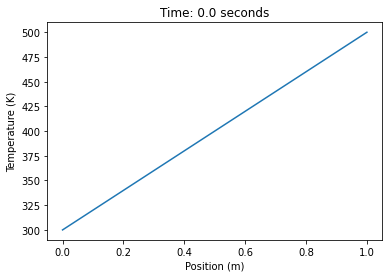

C:\Users\RRAMMOHAN\AppData\Local\Temp\ipykernel_16560\1572307251.py:30: RuntimeWarning: overflow encountered in multiply
  phi += dt * L_fusion * dTdx2 / (rho * c)
C:\Users\RRAMMOHAN\AppData\Local\Temp\ipykernel_16560\1572307251.py:25: RuntimeWarning: overflow encountered in double_scalars
  dTdx2[i] = alpha * (T[i + 1] - 2 * T[i] + T[i - 1]) / dx**2
C:\Users\RRAMMOHAN\AppData\Local\Temp\ipykernel_16560\1572307251.py:30: RuntimeWarning: invalid value encountered in add
  phi += dt * L_fusion * dTdx2 / (rho * c)
C:\Users\RRAMMOHAN\AppData\Local\Temp\ipykernel_16560\1572307251.py:27: RuntimeWarning: invalid value encountered in add
  T[1:-1] += dt * dTdx2[1:-1]


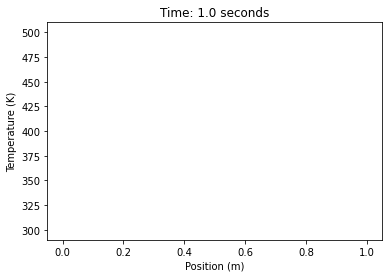

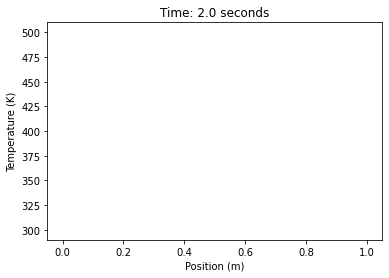

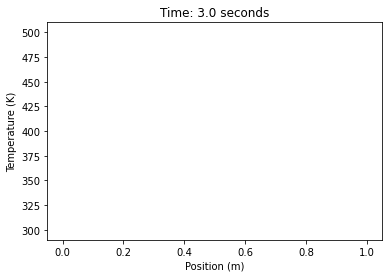

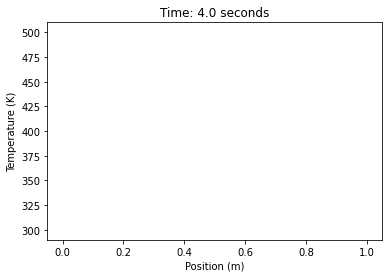

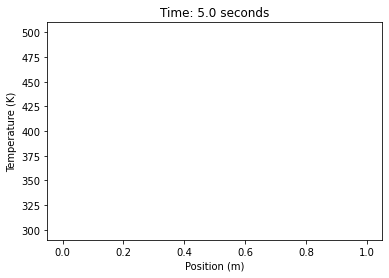

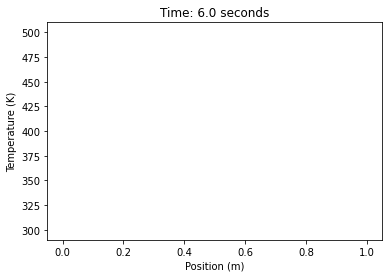

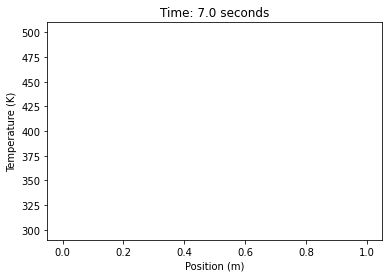

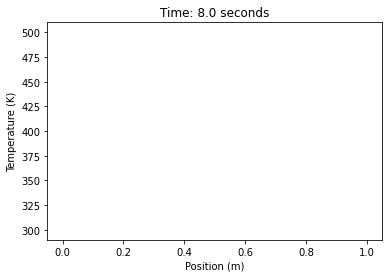

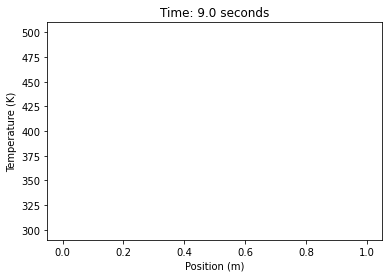

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # Length of the aluminum rod
Nx = 100  # Number of spatial nodes
alpha = 19  # Thermal diffusivity
L_fusion = 3.98e5  # Latent heat of fusion for aluminum (J/kg)

# Material properties
rho = 2700  # Density of aluminum (kg/m^3)
c = 900  # Specific heat of aluminum (J/kg-K)

# Discretization
dx = L / (Nx - 1)
dt = 0.01
T = np.linspace(300, 500, Nx)  # Initial temperature distribution (varying)
phi = np.zeros(Nx)  # Initial phase fraction

# Simulation



for t in range(1000):
    # Explicit finite difference method for heat conduction
    dTdx2 = np.zeros_like(T)
    for i in range(1, Nx - 1):
        dTdx2[i] = alpha * (T[i + 1] - 2 * T[i] + T[i - 1]) / dx**2

    T[1:-1] += dt * dTdx2[1:-1]
    
    # Update phase fraction
    phi += dt * L_fusion * dTdx2 / (rho * c)

    # Visualization
    if t % 100 == 0:
        plt.plot(np.linspace(0, L, Nx), T)
        plt.title(f"Time: {t*dt} seconds")
        plt.xlabel("Position (m)")
        plt.ylabel("Temperature (K)")
        plt.show()
